Wskaźnik newsów - GRUPA AZOTY
=========================

Notowanie
---------------

In [1]:
import share_price as sp
import plot_helper as ph
%matplotlib inline
data =sp.getLastWeekIntraday('GRUPAAZOTY','20190520','20190525')    
                     


Analiza Twittów
----------------------

In [2]:
from twitt_processing import TwittProcessing
from twitter import Twitt
twp= TwittProcessing()

twp. KeyWords= { 'GRUPAAZOTY':{
                    'search': ['azoty'],
                    'ignore':['sponsor'],
                    'sentiment':{
                        'kuluary':-1,
                        'dziwny':-1,
                        'Rosjanin':-1,
                        'rosyjski':-1,                        
                        'oskarżyć':-1,
                        'lepsza':1,
                        'w ciemno':1,
                        'wielki dzień':1,
                        'kontrakt':1,
                        'umowa':1,
                        'porozumienie':1,
                        'historia':1,
                        'pierwszy':1,
                        'wpisać':1
                        }
                    }
               }

twt =  twp.indicator('GRUPAAZOTY','20190520','20190525')
twt_f = list(filter(lambda x: not x.ignore and x.power>1000 and x.sentiment!=0 ,twt))
twt_f.sort(key=lambda x: x.power, reverse=True)
for t in twt_f:    
    print('=========================================================================')
    print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date)+' ' +str(t.user))
    print('-------------------------------------------------------------------------')
    print(t.text)
    print('-------------------------------------------------------------------------')
    print(t.tokens)


145745 [] 2019-05-23 18:39:25 Rt @ RGwiazdowski : przypomnieć nieśmiało , że właściciel grupa azot I PKN orleń , który być właściciel Anwil być jeden I ten sam skarb P… 
379298 [] 2019-05-23 18:16:02 Rt @ RGwiazdowski : przypomnieć nieśmiało , że właściciel grupa azot I PKN orleń , który być właściciel Anwil być jeden I ten sam skarb P… 
141767 [] 2019-05-22 12:08:46 @ Piotr_Stepinski @ PKN_ORLEN @ Grupa_Azoty @ RzecznikORLEN pytać do zadawać @ PKN_ORLEN I @ Grupa_Azoty przy każdy okazja : kiedy zastąpić produkcja wodór ż gaz ziemny elektroliza ż użycie energia ż OZE ? 
175924 [] 2019-05-22 11:33:20 Rt @ Parkietcom : # ParkietChallenge : w ciąg ostatni piąć sesja akcja 5 spółka ż # WIG30 podrożeć o ponad 6 proca . : @ GrupaLOTOS ( 15,3 proc… 
125322 [] 2019-05-22 08:20:44 @ KibicprzezduzeK @ Jinxop myśleć , że orleń , PGE , azot I Asseco być w stanąć wygenerować środek na fajerwerki.. tylko ktoś myślący nie dopuszczać do tęgi . Jak być rywalizacja w liga ? 
144259 [] 2019-05-21 11:34:0

Wykres pokazujacy powiazanie miedzy cenami akcji a sentymentem twittów
------------------------------------------------------------------------------------------------------------

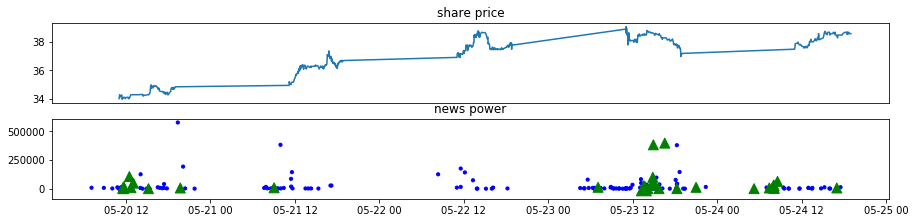

In [3]:
import plot_helper 
import datetime

twt_w = twt #list(filter(lambda x: not x.ignore and x.power>100000 and x.sentiment!=0 ,twt))
plot_helper.plot2(data,twt_w)

df = datetime.datetime.strptime('20190524',"%Y%m%d")
twt_w2 = list(filter(lambda x: x.date >df and  x.power>10000 ,twt))
plot_helper.plot2(data,twt_w2)

twt_w2.sort(key=lambda x: x.date, reverse=True)
for t in twt_w2:    
    print('=========================================================================')
    print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date)+' ' +str(t.user))
    print('-------------------------------------------------------------------------')
    print(t.text)
    print('-------------------------------------------------------------------------')
    print(t.tokens)